In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data Cleaning

In [2]:
airline = pd.read_csv('./Data/airline.csv')

In [3]:
# change some data expressions
airline.loc[airline['satisfaction'] == 'satisfied', 'satisfaction'] = 1
airline.loc[airline['satisfaction'] == 'dissatisfied', 'satisfaction'] = 0
airline.loc[airline['customer_type'] == 'Loyal Customer', 'customer_type'] = 'loyal'
airline.loc[airline['customer_type'] == 'disloyal Customer', 'customer_type'] = 'disloyal'
airline.loc[airline['travel_type'] == 'Personal Travel', 'travel_type'] = 'personal'
airline.loc[airline['travel_type'] == 'Business travel', 'travel_type'] = 'business'

In [4]:
airline.shape

(129880, 23)

In [5]:
# inspect not-rated data (0 = not-rated)
airline.iloc[:, 7:21].apply(lambda x: np.sum(x == 0))

seat_comfort              4797
flight_time_convenient    6664
food_drink                5945
gate_location                2
inflight_wifi              132
inflight_entertainment    2978
online_support               1
online_booking_ease         18
onboard_service              5
leg_room_service           444
baggage_handling             0
checkin_service              1
cleanliness                  5
online_boarding             14
dtype: int64

In [6]:
# drop not-rated data
airline_processed = airline[airline.iloc[:, 7:21].all(axis=1)]
airline_processed.shape

(119611, 23)

In [7]:
airline_processed.to_csv('./Data/airline_processed.csv', index=False)

# Exploratory Data Analysis

In [8]:
del airline
del airline_processed
airline = pd.read_csv('./Data/airline_processed.csv')

In [9]:
colors = ['lightpink', 'lightskyblue']

## Correlation

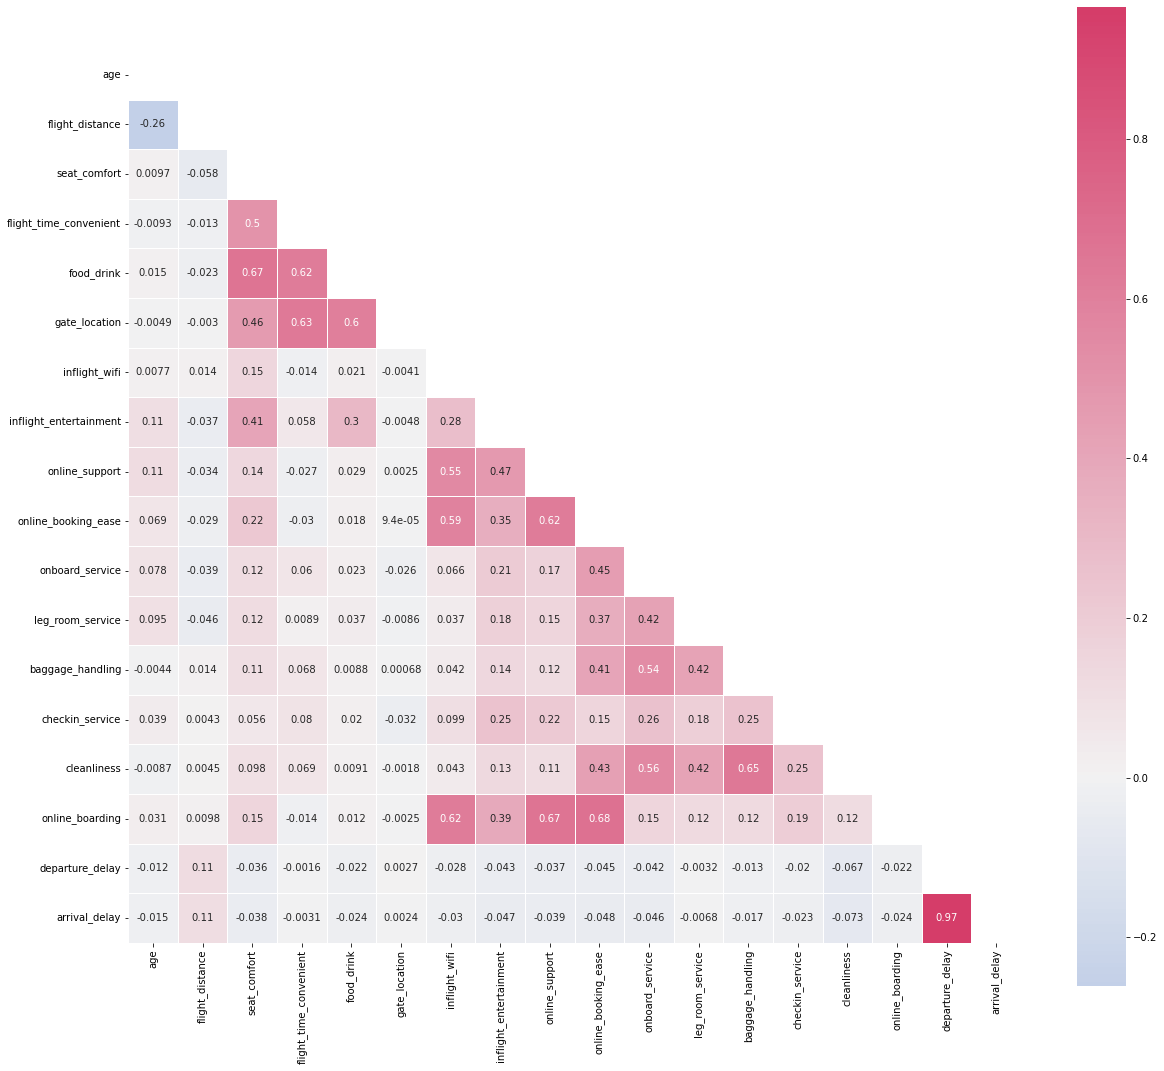

In [10]:
corr = airline.corr().drop('satisfaction', axis=0).drop('satisfaction', axis=1)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(255, 0, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0, square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})
plt.savefig('./Figures/correlation.png', dpi=300, bbox_inches='tight')

## Dependent Variable - Satisfaction

In [11]:
airline['satisfaction'].value_counts()

1    64756
0    54855
Name: satisfaction, dtype: int64

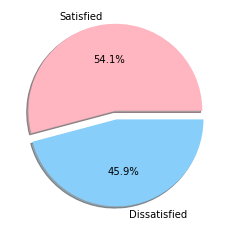

In [12]:
plot_data = airline['satisfaction'].value_counts()
plt.pie(plot_data, labels=["Satisfied", "Dissatisfied"], colors=colors, autopct='%1.1f%%', explode=[0.05, 0.05], shadow=True)
plt.savefig('./Figures/satisfaction.png', dpi=150, bbox_inches='tight')
plt.show()

## Independent Variables - Non Ratings

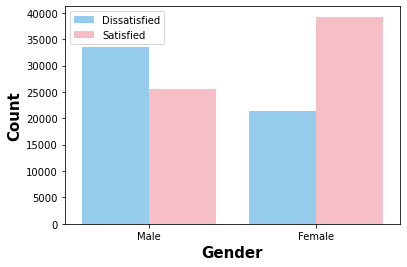

In [13]:
# gender & satisfaction
fig, ax = plt.subplots()
sns.countplot(x=airline['gender'], hue=airline['satisfaction'].map({0: 'Dissatisfied', 1: 'Satisfied'}), ax=ax, palette=colors[::-1])

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.legend(fontsize=10)
ax.set_xlabel('Gender', fontsize=15, weight='bold')
ax.set_ylabel('Count', fontsize=15, weight='bold')

plt.savefig('./Figures/gender_satisfaction.png', dpi=300, bbox_inches='tight')

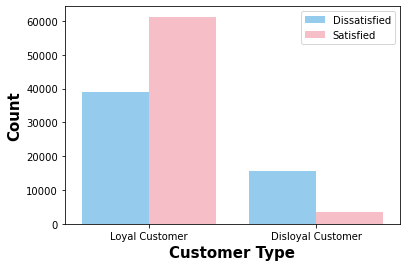

In [14]:
# customer type & satisfaction
fig, ax = plt.subplots()
sns.countplot(
    x=airline['customer_type'].map({'loyal': 'Loyal Customer', 'disloyal': 'Disloyal Customer'}), 
    hue=airline['satisfaction'].map({0: 'Dissatisfied', 1: 'Satisfied'}), ax=ax, palette=colors[::-1])

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.legend(fontsize=10)
ax.set_xlabel('Customer Type', fontsize=15, weight='bold')
ax.set_ylabel('Count', fontsize=15, weight='bold')

plt.savefig('./Figures/customer_satisfaction.png', dpi=300, bbox_inches='tight')

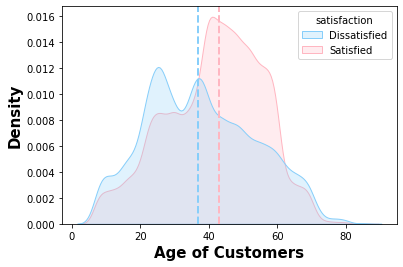

In [15]:
# age & satisfaction
fig, ax = plt.subplots()
sns.kdeplot(
    x=airline['age'], 
    hue=airline['satisfaction'].map({0: 'Dissatisfied', 1: 'Satisfied'}), 
    ax=ax, fill=True, cumulative=False, palette=colors[::-1])

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Age of Customers', fontsize=15, weight='bold')
ax.set_ylabel('Density', fontsize=15, weight='bold')

ax.axvline(airline[airline['satisfaction'] == 1]['age'].median(), linestyle='--', lw=2, color=colors[0])
ax.axvline(airline[airline['satisfaction'] == 0]['age'].median(), linestyle='--', lw=2, color=colors[1])

plt.savefig('./Figures/age_satisfaction.png', dpi=300, bbox_inches='tight')

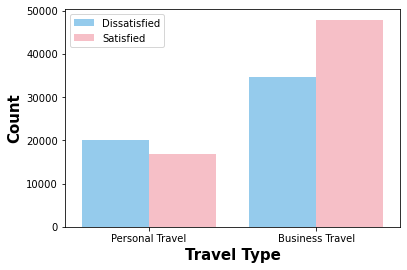

In [16]:
# travel type & satisfaction
fig, ax = plt.subplots()
sns.countplot(
    x=airline['travel_type'].map({'personal': 'Personal Travel', 'business': 'Business Travel'}), 
    hue=airline['satisfaction'].map({0: 'Dissatisfied', 1: 'Satisfied'}), ax=ax, palette=colors[::-1])

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.legend(fontsize=10)
ax.set_xlabel('Travel Type', fontsize=15, weight='bold')
ax.set_ylabel('Count', fontsize=15, weight='bold')

plt.savefig('./Figures/travel_satisfaction.png', dpi=300, bbox_inches='tight')

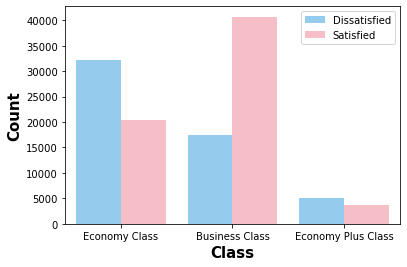

In [17]:
# class & satisfaction
fig, ax = plt.subplots()
sns.countplot(
    x=airline['class'].map({'Eco': 'Economy Class', 'Eco Plus': 'Economy Plus Class', 'Business': 'Business Class'}), 
    hue=airline['satisfaction'].map({0: 'Dissatisfied', 1: 'Satisfied'}), ax=ax, palette=colors[::-1])

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.legend(fontsize=10)
ax.set_xlabel('Class', fontsize=15, weight='bold')
ax.set_ylabel('Count', fontsize=15, weight='bold')

plt.savefig('./Figures/class_satisfaction.png', dpi=300, bbox_inches='tight')

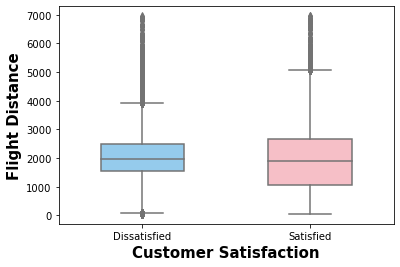

In [18]:
# flight distance & satisfaction
fig, ax = plt.subplots()
sns.boxplot(
    x=airline['satisfaction'].map({0: 'Dissatisfied', 1: 'Satisfied'}), 
    y=airline['flight_distance'], ax=ax, palette=colors[::-1], width=0.5)

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Customer Satisfaction', fontsize=15, weight='bold')
ax.set_ylabel('Flight Distance', fontsize=15, weight='bold')

plt.savefig('./Figures/flight_dist_satisfaction.png', dpi=300, bbox_inches='tight')

## Independent Variables - Ratings

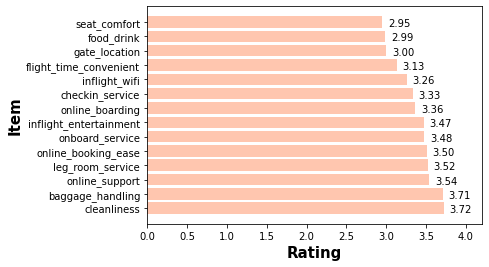

In [19]:
# average ratings
avg_ratings = airline.iloc[:, 7:21].mean().to_frame()
avg_ratings.columns = ['rating']
avg_ratings.sort_values(by='rating', ascending=False, inplace=True)

fig, ax = plt.subplots()
y_pos = np.arange(len(avg_ratings.index))

ax.barh(y_pos, avg_ratings['rating'], align='center', color='lightsalmon', alpha=0.6)
ax.set_xlim(0, 4.2)
ax.set_yticks(y_pos)
ax.set_yticklabels(avg_ratings.index)

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Rating', fontsize=15, weight='bold')
ax.set_ylabel('Item', fontsize=15, weight='bold')

for p in ax.patches:
    count = '{:.2f}'.format(p.get_width())
    x, y = p.get_x() + p.get_width() + 0.35, p.get_y() + 0.1
    ax.annotate(count, (x, y), ha='right')

plt.savefig('./Figures/avg_ratings.png', dpi=300, bbox_inches='tight')

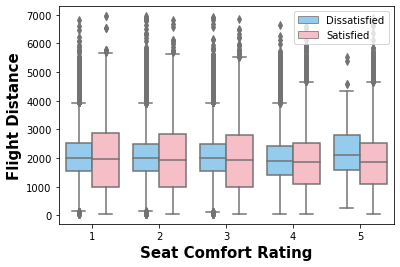

In [20]:
# flight distance, seat comfort, satisfaction
fig, ax = plt.subplots()
sns.boxplot(
    x=airline['seat_comfort'], 
    y=airline['flight_distance'],
    hue=airline['satisfaction'].map({0: 'Dissatisfied', 1: 'Satisfied'}),
    ax=ax, palette=colors[::-1]
)

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.legend(fontsize=10, loc='upper right')
ax.set_xlabel('Seat Comfort Rating', fontsize=15, weight='bold')
ax.set_ylabel('Flight Distance', fontsize=15, weight='bold')

plt.savefig('./Figures/seat_satisfaction.png', dpi=300, bbox_inches='tight')

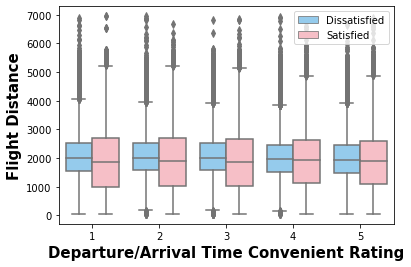

In [21]:
# flight distance, flight time convenient, satisfaction
fig, ax = plt.subplots()
sns.boxplot(
    x=airline['flight_time_convenient'], 
    y=airline['flight_distance'],
    hue=airline['satisfaction'].map({0: 'Dissatisfied', 1: 'Satisfied'}),
    ax=ax, palette=colors[::-1]
)

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.legend(fontsize=10, loc='upper right')
ax.set_xlabel('Departure/Arrival Time Convenient Rating', fontsize=15, weight='bold')
ax.set_ylabel('Flight Distance', fontsize=15, weight='bold')

plt.savefig('./Figures/time_convenient_satisfaction.png', dpi=300, bbox_inches='tight')

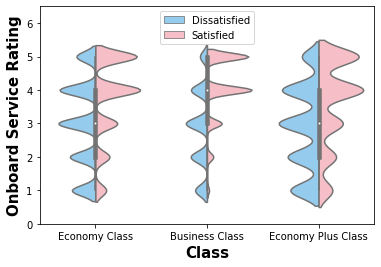

In [22]:
# onboard service rating, class, satisfaction
fig, ax = plt.subplots()
sns.violinplot(
    x=airline['class'].map({'Eco': 'Economy Class', 'Eco Plus': 'Economy Plus Class', 'Business': 'Business Class'}), 
    y=airline['onboard_service'],
    hue=airline['satisfaction'].map({0: 'Dissatisfied', 1: 'Satisfied'}),
    ax=ax, palette=colors[::-1], split=True
)

ax.set_ylim(0, 6.5)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.legend(fontsize=10, loc='upper center')
ax.set_xlabel('Class', fontsize=15, weight='bold')
ax.set_ylabel('Onboard Service Rating', fontsize=15, weight='bold')

plt.savefig('./Figures/onboard_service_class_satisfaction.png', dpi=300, bbox_inches='tight')

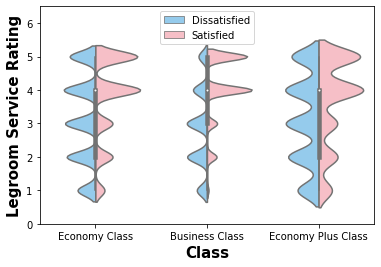

In [23]:
# legroom service rating, class, satisfaction
fig, ax = plt.subplots()
sns.violinplot(
    x=airline['class'].map({'Eco': 'Economy Class', 'Eco Plus': 'Economy Plus Class', 'Business': 'Business Class'}), 
    y=airline['leg_room_service'],
    hue=airline['satisfaction'].map({0: 'Dissatisfied', 1: 'Satisfied'}),
    ax=ax, palette=colors[::-1], split=True
)

ax.set_ylim(0, 6.5)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.legend(fontsize=10, loc='upper center')
ax.set_xlabel('Class', fontsize=15, weight='bold')
ax.set_ylabel('Legroom Service Rating', fontsize=15, weight='bold')

plt.savefig('./Figures/legroom_class_satisfaction.png', dpi=300, bbox_inches='tight')